# Analyse Absentéisme au travail

<div class="alert alert-info"><b><i>Contexte : </i></b>Vous êtes Data analyst au sein d'une entreprise.
<br>Votre <b>mission</b> est de réaliser une exploration de ces données avec Python afin d'analyser et de tirer des conclusions sur l'absentéisme des employés.
Je vais utiliser le fichier <b>"Absenteeism-data.csv"</b> en utilisant (principalement) les bibliothèques Pandas et Numpy. Il s’agit de <b>données fictives</b>.</div>

##### Chargement des modules et données

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("Absenteeism-data.csv")

In [3]:
raw_data

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
695,17,10,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,28,6,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,18,10,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,25,23,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [4]:
data = raw_data.copy()

In [5]:
# Si je veux voir toutes les lignes et colonnes
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


<div class="alert alert-success">
    <b>Retirer la colonne "Id" </b>
</div>

Cette colonne ne servira pas l'analyse de l'absentéisme au travail. Elle ne fera que ralentir l'analyse.

In [7]:
data = data.drop("ID", axis = 1)

Je vérifie malgré tout que chaque ligne représente bien un employé. Que nous n'avons pas plusieurs informations sur quelques employés sur plusieurs jours.

In [8]:
len(data) == len(raw_data['ID'])

True

<div class="alert alert-success">
    <b>Colonne "Absenteeism Time in Hours"</b>
</div>

In [9]:
data['Absenteeism Time in Hours'].min()

0

In [10]:
data['Absenteeism Time in Hours'].max()

120

In [11]:
data['Absenteeism Time in Hours'].median()

3.0

In [12]:
round(data['Absenteeism Time in Hours'].mean(), 2)

6.76

On constate déjà que la *moitié* des employés se sont absentés maximum **3 heures** dans une journée.

La *moyenne* des absences est de **6.76 heures**.

On peut supposer également qu'il y a beaucoup d'outliers. **(Max = 120 heures)**.

<div class="alert alert-success">
    <b>Colonne "Reason for Absence"</b><br>Dummies et Regroupement.
</div>

In [13]:
data['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [14]:
sorted_reasons = sorted(data['Reason for Absence'].unique())
print(', '.join(map(str, sorted_reasons)))

0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28


Il manque le chiffre **20**.

***Mais quelles sont ces raisons d'absence ? Que sont ces numéros ?***

1. Certaines maladies infectieuses et parasitaires
2. Les néoplasmes
3. Maladies du sang et des organes hématopoïétiques et certains troubles du système immunitaire
4. Maladies endocriniennes, nutritionnelles et métaboliques
5. Troubles mentaux et du comportement
6. Maladies du système nerveux
7. Maladies de l'œil et de l'odnexa
8. Maladies de l'oreille et de l'apophyse mastoïde
9. Maladies de l'appareil circulatoire
10. Maladies de l'appareil respiratoire
11. Maladies de l'appareil digestif
12. Maladies de la peau et du tissu sous-cutané
13. Maladies de l'appareil locomoteur et du tissu conjonctif
14. Maladies de l'appareil génito-urinaire
15. Grossesse, accouchement et puerpéralité
16. Certaines affections ayant leur origine dans la période périnatale
17. Malformations congénitales, déformations et anomalies chromosomiques
18. Symptômes, signes et résultats anormaux d'examens cliniques et de laboratoire, non classés ailleurs
19. Blessures, empoisonnements et certaines autres conséquences d'origine externe
20. Causes externes de morbidité et de mortalité
21. Facteurs influençant l'état de santé et les contacts avec les services de santé.
22. Suivi des patients
23. Consultation médicale
24. Don de sang
25. Examen de laboratoire
26. Absence injustifiée
27. Kinésithérapie
28. Consultation dentaire

***Ce sont donc des catégories***.

La meilleure solution est donc de transformer ces valeurs en **variables muettes**.

Dans l'analyse de régression, une *variable muette* est une variable qui prend une **valeur binaire** (0 ou 1) pour indiquer l'absence ou la présence d'un effet catégorique susceptible de modifier le résultat.

In [15]:
reason_columns = pd.get_dummies(data['Reason for Absence']).astype(int)

In [16]:
reason_columns['Check'] = reason_columns.sum(axis = 1)

In [17]:
reason_columns['Check'].unique()

array([1])

Je vérifie que tout est en ordre.

In [18]:
reason_columns = reason_columns.drop('Check', axis = 1)

On lâche également la colonne 0, car elle ne represente rien.

In [19]:
reason_columns = pd.get_dummies(data['Reason for Absence'], drop_first= True).astype(int)

In [20]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [21]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

<div>Si on ajoute toutes les colonnes de reason_colomns, le dataframe sera <i>illisible</i>. C''est la raison pour laquelle je vais sciender ces colonnes en <b>différents groupes</b> pour avoir une vision globale des raisons d''absentéisme.<br>
    Groupe 1 - 1-14 : Maladies<br>
Groupe 2 - 15-17 : Grossesse<br>
Groupe 3 - 18-21 : Mortalité anormale<br>
Groupe 4 - 22-28 : Raisons légères
</div>

In [22]:
data['Reason 1'] = reason_columns.loc[:,:14].max(axis = 1)
data['Reason 2'] = reason_columns.loc[:,15:17].max(axis = 1)
data['Reason 3'] = reason_columns.loc[:,18:21].max(axis = 1)
data['Reason 4'] = reason_columns.loc[:,22:].max(axis = 1)

In [23]:
data = data.drop("Reason for Absence", axis = 1)

In [24]:
data.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason 1,Reason 2,Reason 3,Reason 4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [25]:
data.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason 1',
       'Reason 2', 'Reason 3', 'Reason 4'], dtype=object)

In [26]:
columns_rearranged = ['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4', 'Date', 'Transportation Expense', 
                      'Distance to Work', 'Age','Daily Work Load Average', 'Body Mass Index', 'Education',
                      'Children', 'Pets', 'Absenteeism Time in Hours']
data = data[columns_rearranged]

In [27]:
data.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [28]:
df_checkpoint_1 = data.copy()

<div class="alert alert-success">
    <b>Colonne "Date"</b>
</div>

In [29]:
data['Date'] = pd.to_datetime(data['Date'], format="%d/%m/%Y")

In [30]:
data['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [31]:
months = [rows['Date'].month for index, rows in data.iterrows()]

In [32]:
name_months = {'Jan' : 1, 'Feb': 2, 'Mar': 3, 'April': 4, 'May': 5, 'June': 6, 
               'July': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [33]:
def n_months(value, dictionary):
    for x in dictionary:
        if value == dictionary[x]:
            return x

In [34]:
data['Month'] = months

In [35]:
data['Month'] = data['Month'].apply(lambda x: n_months(x, name_months))

In [36]:
data.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,July
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,July
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,July
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,July
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,July


In [37]:
pip install babel

Note: you may need to restart the kernel to use updated packages.


In [38]:
from babel.dates import format_date
import locale

locale.setlocale(locale.LC_TIME, 'fr_FR.UTF-8')

'fr_FR.UTF-8'

In [43]:
def get_month_in_french(date):
    return format_date(date, format='MMMM', locale='fr')

In [46]:
data['Month'] = data['Date'].apply(get_month_in_french)

In [48]:
data['Month'] = data['Month'].str.capitalize()

In [50]:
def get_weekday_in_french(date):
    return format_date(date, format='EEEE', locale='fr')

data['Day of the week'] =  data['Date'].apply(get_weekday_in_french)

In [51]:
data['Day of the week'] = data['Day of the week'].astype(str)

In [52]:
data['Day of the week'] = data['Day of the week'].str.capitalize()

In [53]:
data.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,Juillet,Mardi
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,Juillet,Mardi
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,Juillet,Mercredi
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,Juillet,Jeudi
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,Juillet,Jeudi


In [54]:
df_checkpoint_2 = data.copy()

<div class="alert alert-success">
    <b>Colonne "Education"</b>
</div>

In [55]:
data['Education'].unique()

array([1, 3, 2, 4])

<div><b>Que représente ces catégories Education ?</b><br>
    Niveau 1 : Lycée<br>
Niveau 2 : Diplôme<br>
Niveau 3 : Lisence<br>
Niveau 4 : Master/ Doctorat
</div>

In [56]:
data['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

Je constate que la plupart se sont arrêtés au lycée, et qu'il serait judicieux pour l'analyse de mettre le niveau 2, 3 et 4 dans le même panier.

In [57]:
data['Education'] = data['Education'].map({1: 0, 2: 1, 3:1, 4:1})

In [58]:
data['Education'].unique()

array([0, 1])

In [59]:
df_checkpoint_3 = data.copy()

In [60]:
data.head()

,Reason 1,Reason 2,Reason 3,Reason 4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day of the week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,Juillet,Mardi
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,Juillet,Mardi
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,Juillet,Mercredi
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,Juillet,Jeudi
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,Juillet,Jeudi


In [147]:
data.to_csv("data-cleaned.csv")

<div class="alert alert-success">
    <b>Data Vizualization</b>
</div>

In [63]:
numeric_data = data.select_dtypes(include=[float, int])

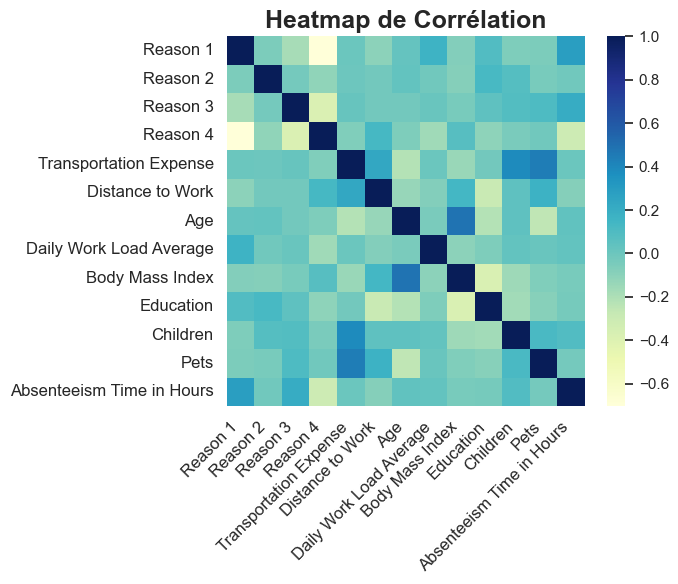

In [133]:
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(7, 6), dpi=100)
sns.heatmap(correlation_matrix, cmap="YlGnBu")
# Améliorer le graphique
plt.title('Heatmap de Corrélation', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotation et alignement des labels des axes x
plt.yticks(rotation=0, fontsize=12)  # Rotation des labels des axes y

plt.tight_layout()  # Ajuster les marges pour éviter que les labels ne soient coupés
plt.show()

Analyse de la Corrélation :

Dépenses de Transport : Il est observé que les dépenses de transport sont corrélées avec le nombre d'enfants et d'animaux domestiques. Cette relation est logique, car une augmentation du nombre d'enfants et d'animaux domestiques peut entraîner des frais de transport plus élevés, ce qui est cohérent avec les attentes.

Absence au Travail : Cependant, les dépenses de transport ne semblent pas avoir de lien significatif avec l'absentéisme au travail. Les données n'indiquent pas de corrélation claire entre les frais de transport et le nombre d'heures d'absence, suggérant que d'autres facteurs pourraient être plus influents dans l'absentéisme des employés.

Heures d'Absence et Motifs : L'analyse des motifs d'absence révèle quelques corrélations intéressantes :

Raisons légères (Catégorie 4) : Cette catégorie est associée à un nombre relativement faible d'heures d'absence. Cela est en accord avec l'idée que des motifs moins graves entraînent généralement des absences plus courtes.
Maladies (Catégorie 1) et Mortalité Anormale (Catégorie 3) : Ces catégories montrent une corrélation positive avec un nombre élevé d'heures d'absence. Cela est attendu, car les maladies et les situations de mortalité anormale sont souvent des motifs graves nécessitant des absences prolongées.

In [70]:
Raisons = {
    'Maladies': data['Reason 1'].sum(),
    'Grossesse': data['Reason 2'].sum(),
    'Maladies anormales': data['Reason 3'].sum(),
    'Raisons légères': data['Reason 4'].sum()
}

In [71]:
# Extraire les labels et les valeurs du dictionnaire
labels = list(Raisons.keys())
somme_absences = list(Raisons.values())

In [136]:
colors = sns.color_palette("viridis", len(labels))

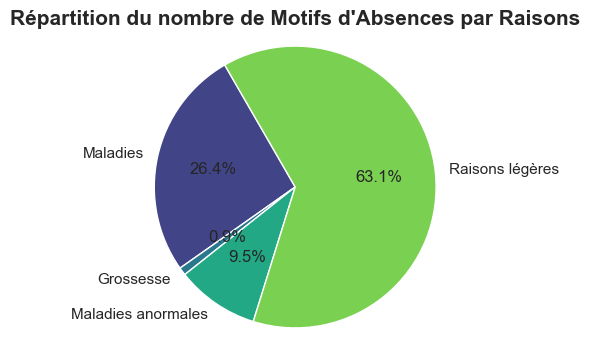

In [139]:
# Création du camembert
plt.figure(figsize=(4, 4))
plt.pie(somme_absences, labels=labels, startangle=120, colors=colors, autopct='%.1f%%')
plt.title('Répartition du nombre de Motifs d\'Absences par Raisons', fontsize=15, fontweight='bold')
plt.axis('equal')  # Assure que le camembert est un cercle
plt.show()

Les principales raisons d'absentéisme sont donc des raisons légères, et ensuite les maladies.

In [76]:
raisons_heures = list(data.groupby(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4'], 
                                   observed=True)['Absenteeism Time in Hours'].sum())

In [77]:
raisons = ['Maladies', 'Grossesse', 'Maladies anormales', 'Raisons légères']

In [78]:
raisons_heures

[0, 1490, 944, 30, 2269]

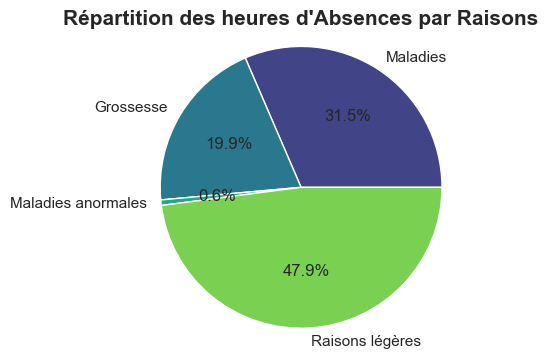

In [140]:
# Création du camembert
plt.figure(figsize=(4, 4))
plt.pie(raisons_heures[1:], labels=raisons, colors=colors, autopct='%.1f%%')
plt.title('Répartition des heures d\'Absences par Raisons', fontsize=15, fontweight='bold')
plt.axis('equal')  # Assure que le camembert est un cercle
plt.show()

On peut voir que même si peu de personnes se sont absentés pour la grossesse, le nombre d'heures d'absence est important, un nombre qu'il ne faut pas négliger.

In [81]:
tableau_croisé = data.pivot_table(values='Absenteeism Time in Hours', index='Day of the week', aggfunc='sum').reset_index()
tableau_croisé

,Day of the week,Absenteeism Time in Hours
0,Dimanche,33
1,Jeudi,476
2,Lundi,1325
3,Mardi,1061
4,Mercredi,1057
5,Samedi,34
6,Vendredi,747


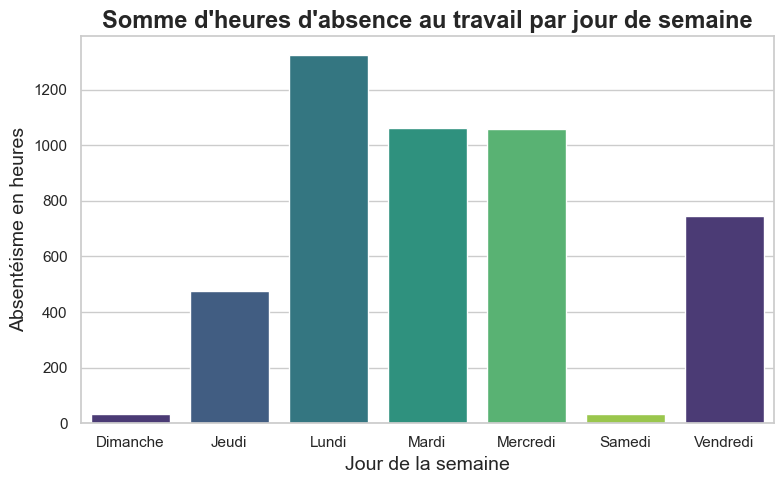

In [142]:
palette = sns.color_palette("viridis")

# Créer le graphique en barres
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=tableau_croisé,
    x='Day of the week', 
    y='Absenteeism Time in Hours', 
    palette=palette
)

plt.title('Somme d\'heures d\'absence au travail par jour de semaine', fontsize=17, fontweight='bold')
plt.xlabel('Jour de la semaine', fontsize=14)
plt.ylabel('Absentéisme en heures', fontsize=14)

# Afficher le graphique
plt.tight_layout()
plt.show()

Les gens s'absentent donc le plus le **lundi** suivi du mardi et du mercredi.

In [83]:
tableau_croisé2 = data.pivot_table(values='Absenteeism Time in Hours', index='Month', aggfunc='sum').reset_index()
tableau_croisé2

,Month,Absenteeism Time in Hours
0,Août,288
1,Avril,482
2,Décembre,414
3,Février,294
4,Janvier,222
5,Juillet,470
6,Juin,313
7,Mai,371
8,Mars,765
9,Novembre,473


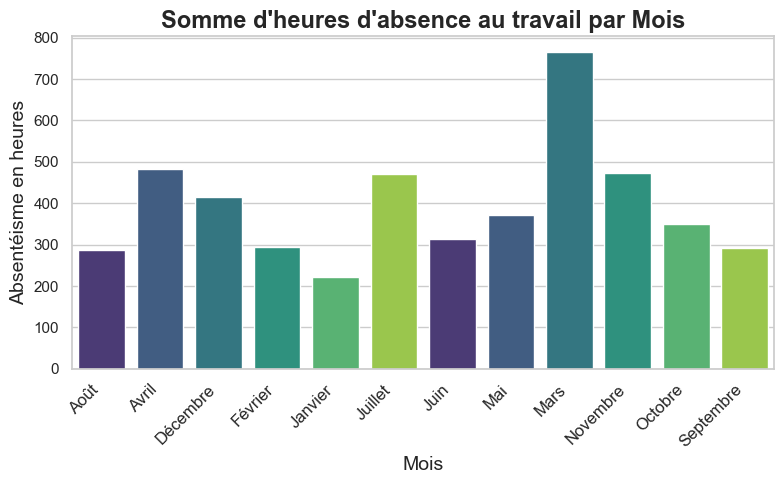

In [144]:
palette = sns.color_palette("viridis")

# Créer le graphique en barres
plt.figure(figsize=(8, 5))
barplot = sns.barplot(
    data=tableau_croisé2,
    x='Month', 
    y='Absenteeism Time in Hours', 
    palette=palette
)

plt.title('Somme d\'heures d\'absence au travail par Mois', fontsize=17, fontweight='bold')
plt.xlabel('Mois', fontsize=14)
plt.ylabel('Absentéisme en heures', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
# Afficher le graphique
plt.tight_layout()
plt.show()

Les gens s'absentent donc le plus le mois de **Mars** suivi du mois de **Juillet**.

In [85]:
raisons_IMC = data.groupby(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4'], 
                                observed=True)['Body Mass Index'].mean().reset_index()

In [86]:
raisons_IMC[1:]

,Reason 1,Reason 2,Reason 3,Reason 4,Body Mass Index
1,0,0,0,1,26.985646
2,0,0,1,0,26.222222
3,0,1,0,0,23.166667
4,1,0,0,0,26.165714


In [92]:
raisons_IMC = data.groupby(['Reason 1', 'Reason 2', 'Reason 3', 'Reason 4'], 
                                observed=True)['Body Mass Index'].mean()

In [87]:
raisons = ['Maladies', 'Grossesse', 'Maladies anormales', 'Raisons légères']

In [94]:
raisons_IMC_arrondi = [round(x, 2) for x in raisons_IMC]

In [95]:
raisons_IMC_arrondi

[28.05, 26.99, 26.22, 23.17, 26.17]

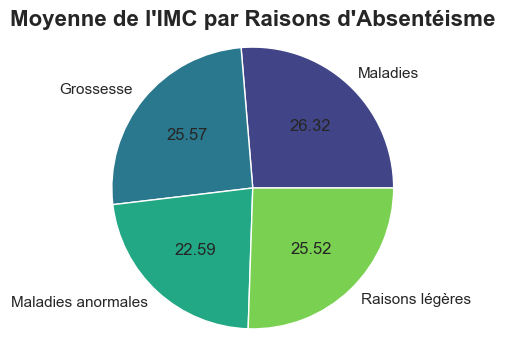

In [146]:
plt.figure(figsize=(4,4))
plt.pie(raisons_IMC_arrondi[1:], labels=raisons, colors =colors, autopct='%.2f')
plt.title("Moyenne de l'IMC par Raisons d'Absentéisme", fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

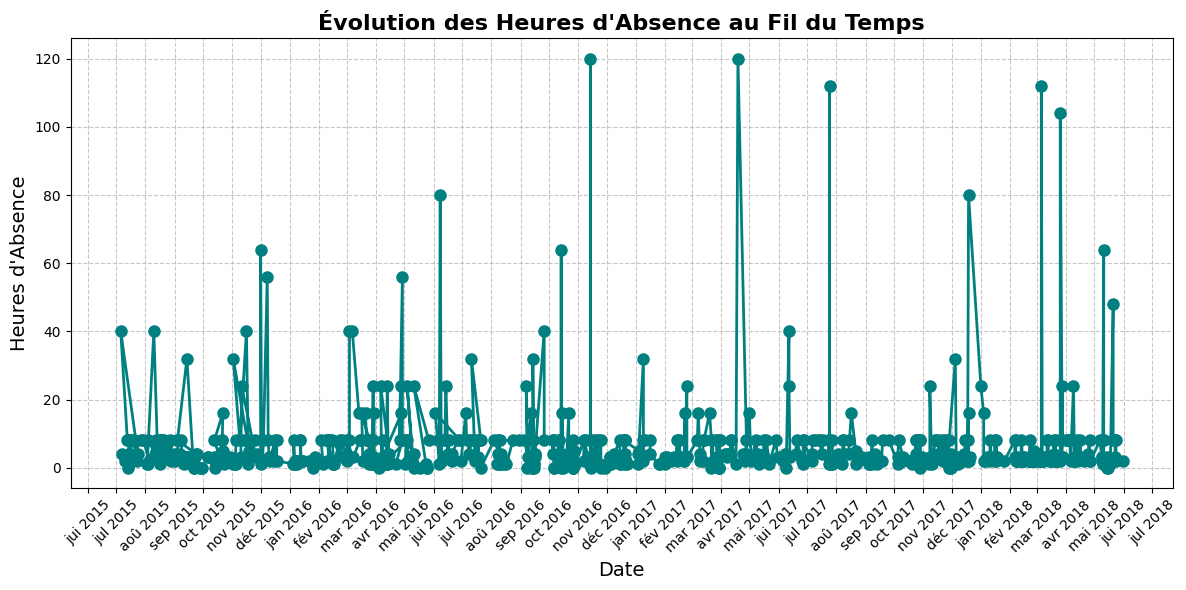

In [102]:
import matplotlib.dates as mdates

# Tracer la série temporelle
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Absenteeism Time in Hours'], marker='o', linestyle='-', color='teal', linewidth=2, markersize=8)

# Amélioration du graphique
plt.title('Évolution des Heures d\'Absence au Fil du Temps', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Heures d\'Absence', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatage des dates sur l'axe x
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=45)

# Affichage du graphique
plt.tight_layout()
plt.show()

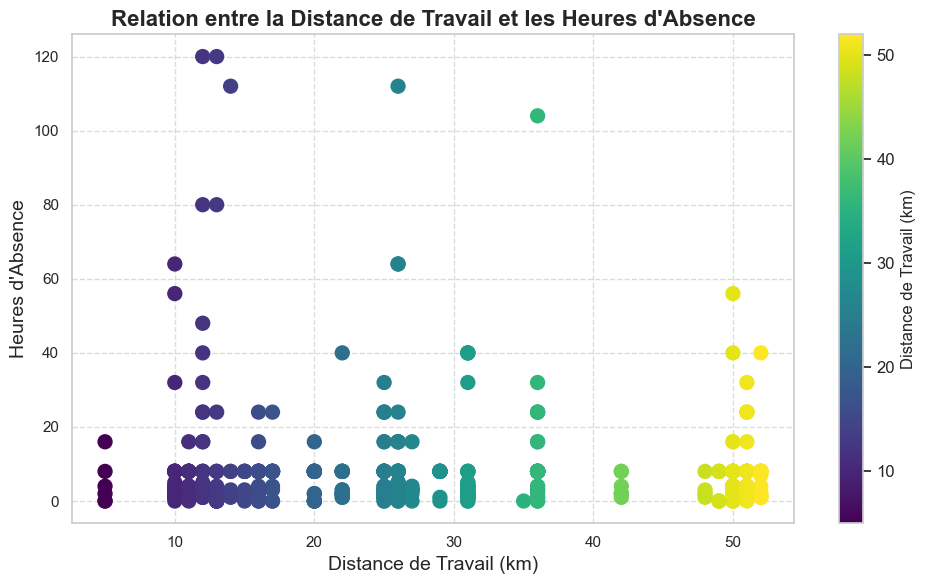

In [110]:
import matplotlib as mpl

# Normaliser les données pour la colorbar
norm = mpl.colors.Normalize(vmin=data['Distance to Work'].min(), vmax=data['Distance to Work'].max())
cmap = plt.get_cmap('viridis')

# Tracer le scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=data['Distance to Work'], y=data['Absenteeism Time in Hours'],
                      c=data['Distance to Work'], cmap=cmap, norm=norm, s=100)

# Ajouter la colorbar
cbar = plt.colorbar(scatter, label='Distance de Travail (km)')
cbar.ax.tick_params(labelsize=12)  # Taille de la police des ticks de la colorbar

# Amélioration du graphique
plt.title('Relation entre la Distance de Travail et les Heures d\'Absence', fontsize=16, fontweight='bold')
plt.xlabel('Distance de Travail (km)', fontsize=14)
plt.ylabel('Heures d\'Absence', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()